In [ ]:
# import the required libraries
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import normaltest, spearmanr
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.feature_selection import mutual_info_classif
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv("clustering_preprocessed_data.csv")

In [23]:
# List of columns to exclude from normalization and winsorization
excluded_columns = ['Type', 'Machine failure']

### Understanding the Data now

Rigorous Statistical Testing

- Normality tests
- Correlation significance
- Group comparisons
- Effect size calculations


Multiple Analysis Methods

- Parametric and non-parametric approaches
- Multiple correlation metrics
- Various importance measures


Statistical Rigor

- Hypothesis testing
- Effect size calculations
- Significance levels

In [ ]:
class ManufacturingDataAnalyzer:
    """
    A comprehensive statistical analyzer for manufacturing data
    focusing on machine failure prediction.
    """
    
    def __init__(self, df, target_col='Machine failure'):
        """Initialize with dataset and target column"""
        self.df = df
        self.target_col = target_col
        self.X = df.drop(columns=[target_col])
        self.y = df[target_col]
        
    def descriptive_statistics(self):
        """
        Perform comprehensive descriptive statistics analysis
        including central tendency, dispersion, and shape measures.
        """
        stats_df = pd.DataFrame()
        
        for column in self.X.columns:
            data = self.X[column]
            stats_dict = {
                'Mean': data.mean(),
                'Median': data.median(),
                'Std Dev': data.std(),
                'IQR': data.quantile(0.75) - data.quantile(0.25),
                'Skewness': data.skew(),
                'Kurtosis': data.kurtosis(),
                'Normality Test p-value': stats.normaltest(data)[1]
            }
            stats_df[column] = pd.Series(stats_dict)
        
        return stats_df.T
    
    def test_feature_normality(self):
        """
        Perform D'Agostino-Pearson test for normality on each feature.
        H0: Data comes from normal distribution.
        """
        normality_results = {}
        
        for column in self.X.columns:
            statistic, p_value = normaltest(self.X[column])
            normality_results[column] = {
                'statistic': statistic,
                'p_value': p_value,
                'is_normal': p_value > 0.05
            }
        
        return pd.DataFrame(normality_results).T
    
    def analyze_correlations(self):
        """
        Perform correlation analysis using both Pearson and Spearman methods.
        Also conducts significance tests for correlations.
        """
        pearson_corr = self.X.corr(method='pearson')
        spearman_corr = self.X.corr(method='spearman')
        
        # Significance testing for correlations
        sig_matrix = pd.DataFrame(index=self.X.columns, columns=self.X.columns)
        
        for i in self.X.columns:
            for j in self.X.columns:
                if i != j:
                    coef, p_value = spearmanr(self.X[i], self.X[j])
                    sig_matrix.loc[i,j] = p_value
        
        return {
            'pearson': pearson_corr,
            'spearman': spearman_corr,
            'significance': sig_matrix
        }
    
    def feature_importance_analysis(self):
        """
        Analyze feature importance using multiple statistical methods:
        1. Information Gain (Mutual Information)
        2. ANOVA F-test
        3. Random Forest Importance
        """
        importance_df = pd.DataFrame(index=self.X.columns)
        
        # Mutual Information
        importance_df['mutual_info'] = mutual_info_classif(self.X, self.y)
        
        # ANOVA F-test for each feature
        for column in self.X.columns:
            f_stat, p_val = stats.f_oneway(
                self.X[column][self.y == 0],
                self.X[column][self.y == 1]
            )
            importance_df.loc[column, 'anova_f_stat'] = f_stat
            importance_df.loc[column, 'anova_p_value'] = p_val
        
        # Random Forest Importance
        rf = RandomForestClassifier(random_state=42)
        rf.fit(self.X, self.y)
        importance_df['rf_importance'] = rf.feature_importances_
        
        return importance_df.sort_values('mutual_info', ascending=False)
    
    def group_comparison_analysis(self):
        """
        Perform statistical tests comparing feature distributions
        between failure and non-failure groups.
        """
        comparison_results = {}
        
        for column in self.X.columns:
            # Mann-Whitney U test (non-parametric)
            mw_stat, mw_p = stats.mannwhitneyu(
                self.X[column][self.y == 0],
                self.X[column][self.y == 1],
                alternative='two-sided'
            )
            
            # Effect size (Cohen's d)
            d = (self.X[column][self.y == 1].mean() - 
                 self.X[column][self.y == 0].mean()) / \
                self.X[column].std()
            
            comparison_results[column] = {
                'mann_whitney_stat': mw_stat,
                'mann_whitney_p': mw_p,
                'cohens_d': d
            }
        
        return pd.DataFrame(comparison_results).T
    
    def visualize_distributions(self):
        """Generate statistical visualization of distributions"""
        # Implementation for visualizations
        pass  # Would you like me to implement this?

analyzer = ManufacturingDataAnalyzer(df)

# Get comprehensive statistical analysis
desc_stats = analyzer.descriptive_statistics()
normality_tests = analyzer.test_feature_normality()
correlation_analysis = analyzer.analyze_correlations()
feature_importance = analyzer.feature_importance_analysis()
group_comparisons = analyzer.group_comparison_analysis()

# Print summary
print("=== Statistical Analysis Summary ===")
print("\nDescriptive Statistics:")
print(desc_stats)
print("\nFeature Importance Analysis:")
print(feature_importance)

=== Statistical Analysis Summary ===

Descriptive Statistics:
                                                      Mean    Median  \
Air temperature                                   0.242024  0.323264   
Process temperature                               0.116787  0.260991   
Rotational speed                                  0.104720 -0.127430   
Torque                                           -0.032733  0.118519   
Tool wear                                         1.360097  1.433439   
Power                                            -0.054109  0.056199   
temperature_differential                         -0.064525 -0.119242   
power_speed_ratio                                -0.039163  0.168274   
thermal_stress                                   -0.244026 -0.337795   
operational_stress                                0.329128  0.268097   
efficiency_index                                  0.557084  0.608901   
temperature_stability                            -0.053934  0.474708   
po

### Analyze Feature Groups Separately

Statistical Significance

- ANOVA test results
- Effect sizes
- Proportion of significant features per group


Feature Importance

- Mutual Information scores
- Group-level importance
- Top features in each group


Group Performance

- Average importance by group
- Significance rates by group
- Group-level statistics


Correlation Analysis

- High correlation pairs
- Correlation matrices
- Potential redundancy


=== primary_sensors Analysis ===

Statistically Significant Features (p < 0.05):
                     f_statistic        p_value  effect_size
Tool wear            1436.997158  8.433554e-294     0.715530
Air temperature       774.833152  2.900569e-164     0.541424
Rotational speed      443.928466   1.913332e-96    -0.416303
Torque                341.321167   5.887630e-75     0.366854
Process temperature   179.780772   1.220100e-40     0.268365

Top Features by Mutual Information:
Process temperature    0.521044
Air temperature        0.510050
Tool wear              0.480915
Torque                 0.451874
Rotational speed       0.401765
dtype: float64

High Correlations (|r| > 0.7):
Process temperature - Air temperature: 0.852
Torque - Rotational speed: -0.935

=== derived_metrics Analysis ===

Statistically Significant Features (p < 0.05):
                          f_statistic        p_value  effect_size
operational_stress        1934.208565   0.000000e+00     0.812557
temperature_dif

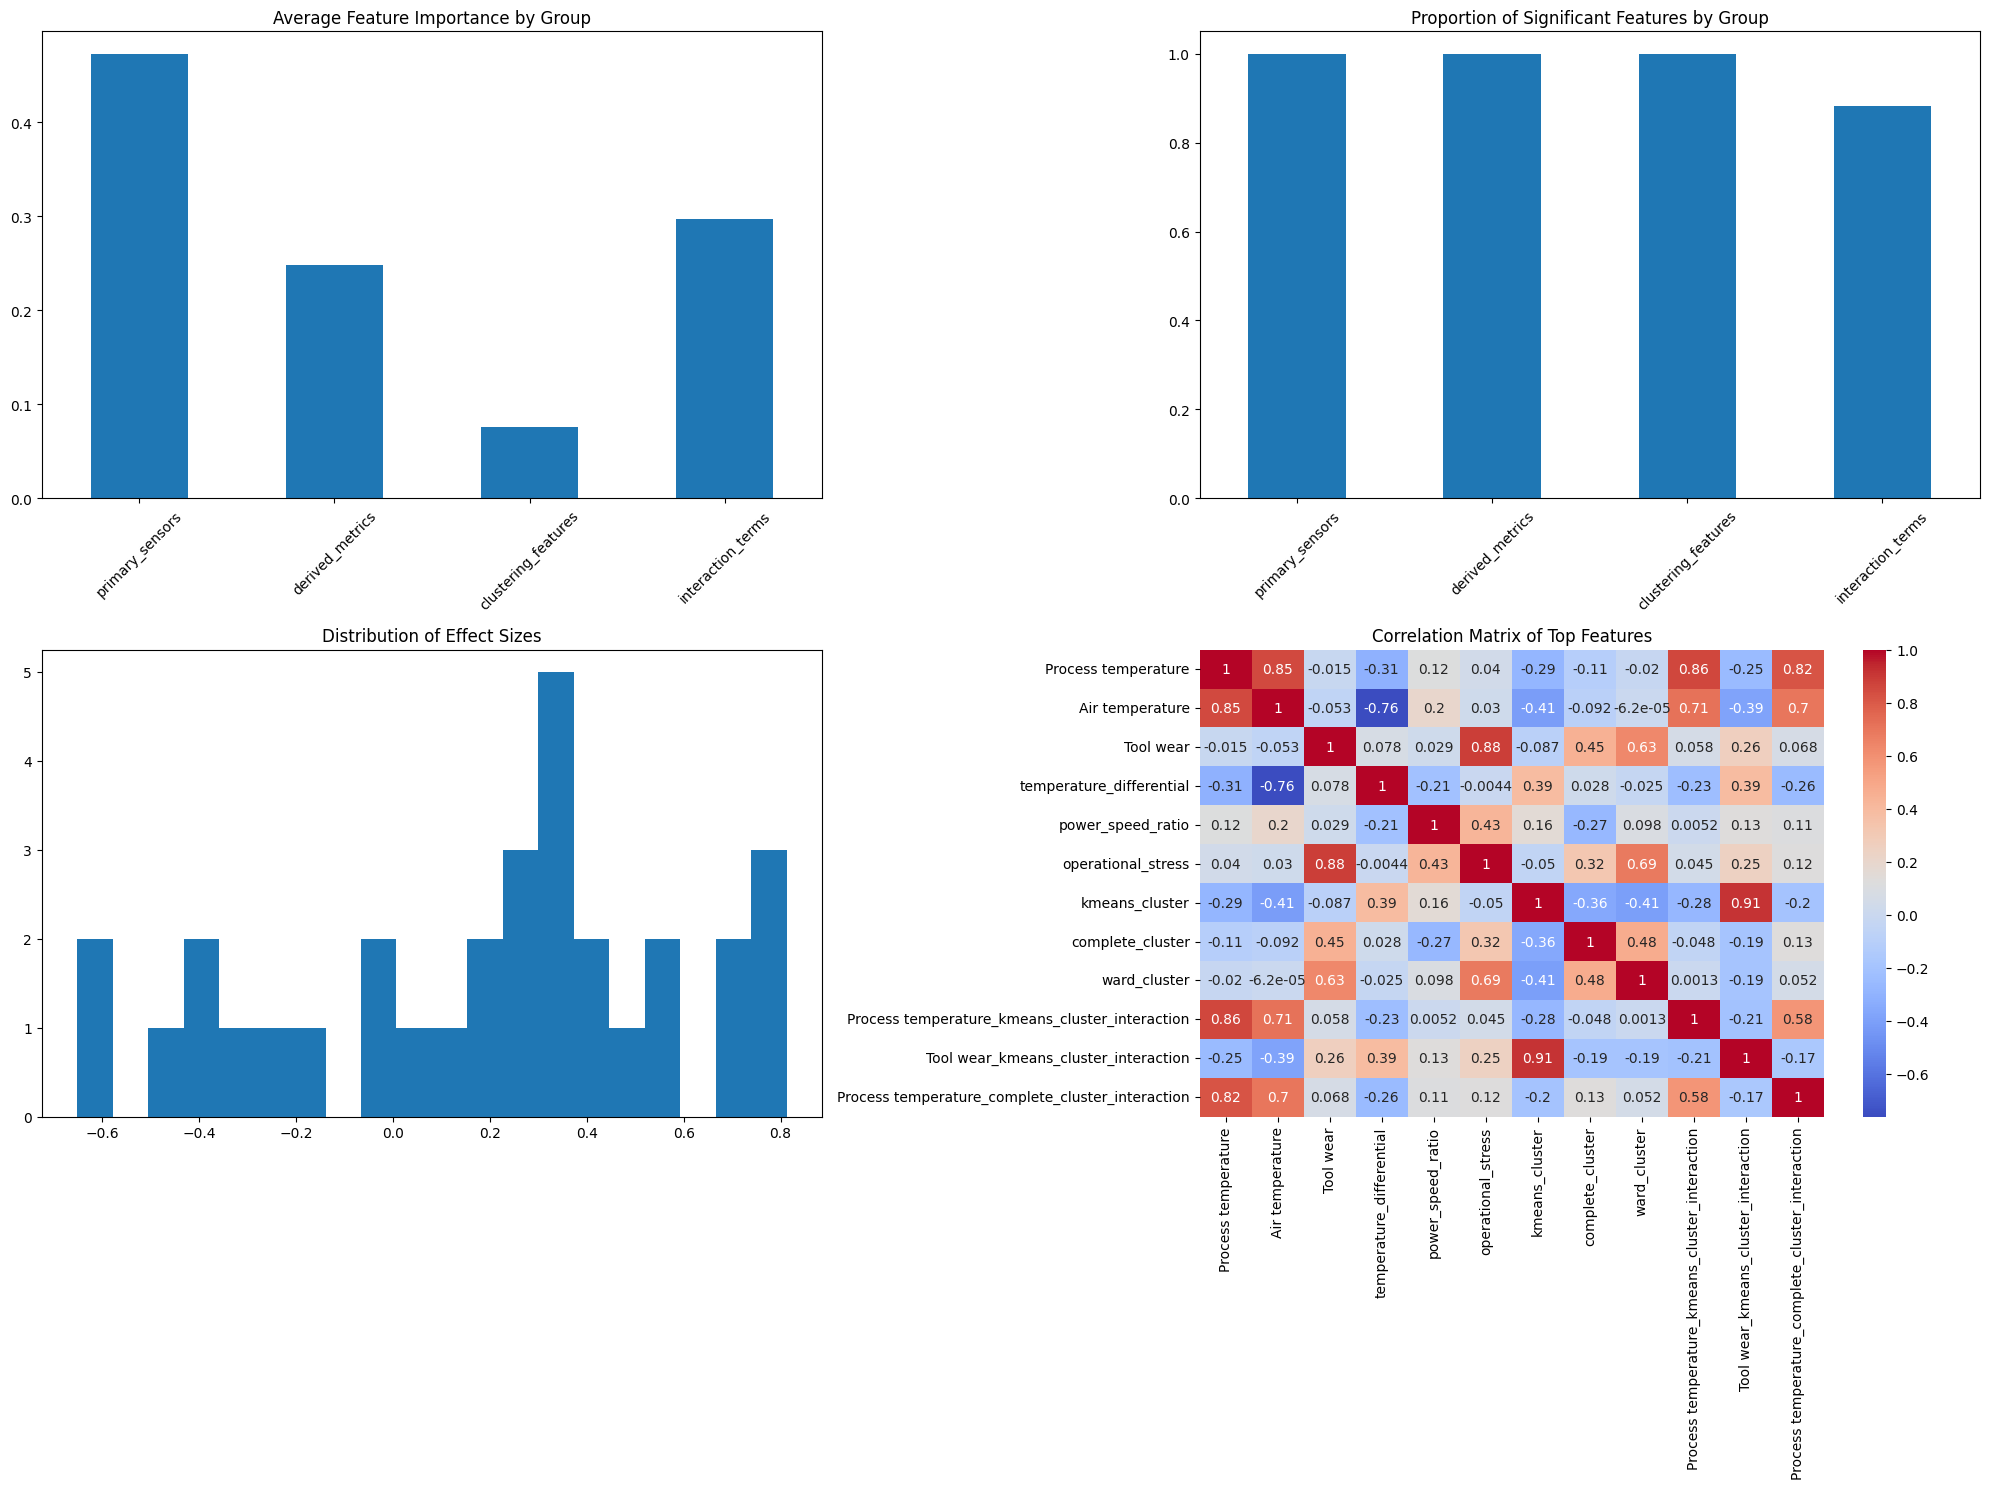

In [ ]:
def phase1_feature_analysis(df, target_col='Machine failure'):
    """
    Phase 1: Comprehensive Feature Analysis
    
    1. Statistical Significance
    2. Feature Importance
    3. Group Performance
    4. Correlation Analysis
    """
    # Define feature groups
    feature_groups = {
        'primary_sensors': [
            'Air temperature', 'Process temperature', 
            'Rotational speed', 'Torque', 'Tool wear'
        ],
        'derived_metrics': [
            'temperature_differential', 'power_speed_ratio',
            'thermal_stress', 'operational_stress', 
            'efficiency_index'
        ],
        'clustering_features': [
            'kmeans_cluster', 'ward_cluster', 'complete_cluster',
            'average_cluster', 'dbscan_cluster'
        ],
        'interaction_terms': [col for col in df.columns if '_interaction' in col]
    }
    
    analysis_results = {}
    
    for group_name, features in feature_groups.items():
        # 1. Statistical Significance Tests
        significance_tests = {}
        for feature in features:
            # ANOVA Test
            f_stat, p_val = stats.f_oneway(
                df[df[target_col]==0][feature],
                df[df[target_col]==1][feature]
            )
            
            # Effect Size (Cohen's d)
            d = (df[df[target_col]==1][feature].mean() - 
                 df[df[target_col]==0][feature].mean()) / df[feature].std()
            
            significance_tests[feature] = {
                'f_statistic': f_stat,
                'p_value': p_val,
                'effect_size': d
            }
        
        # 2. Feature Importance (Mutual Information)
        mi_scores = mutual_info_classif(df[features], df[target_col])
        importance_scores = dict(zip(features, mi_scores))
        
        # 3. Basic Statistics
        basic_stats = df[features].describe()
        
        # 4. Correlation Analysis
        correlation_matrix = df[features].corr()
        
        # Store all results
        analysis_results[group_name] = {
            'significance_tests': pd.DataFrame(significance_tests).T,
            'importance_scores': importance_scores,
            'basic_stats': basic_stats,
            'correlation_matrix': correlation_matrix
        }
        
        # Print Summary
        print(f"\n=== {group_name} Analysis ===")
        
        # Significant Features
        sig_features = pd.DataFrame(significance_tests).T
        print("\nStatistically Significant Features (p < 0.05):")
        print(sig_features[sig_features['p_value'] < 0.05].sort_values('p_value'))
        
        # Top Features by Importance
        print("\nTop Features by Mutual Information:")
        mi_series = pd.Series(importance_scores)
        print(mi_series.sort_values(ascending=False))
        
        # High Correlations
        high_corr = []
        for i in range(len(features)):
            for j in range(i):
                if abs(correlation_matrix.iloc[i,j]) > 0.7:
                    high_corr.append({
                        'features': (features[i], features[j]),
                        'correlation': correlation_matrix.iloc[i,j]
                    })
        if high_corr:
            print("\nHigh Correlations (|r| > 0.7):")
            for corr in high_corr:
                print(f"{corr['features'][0]} - {corr['features'][1]}: {corr['correlation']:.3f}")
    
    # Visualize Results
    plt.figure(figsize=(20, 15))
    
    # 1. Feature Importance by Group
    plt.subplot(2, 2, 1)
    group_importance = {group: np.mean(list(results['importance_scores'].values())) 
                       for group, results in analysis_results.items()}
    pd.Series(group_importance).plot(kind='bar')
    plt.title('Average Feature Importance by Group')
    plt.xticks(rotation=45)
    
    # 2. Statistical Significance by Group
    plt.subplot(2, 2, 2)
    group_significance = {
        group: (results['significance_tests']['p_value'] < 0.05).mean()
        for group, results in analysis_results.items()
    }
    pd.Series(group_significance).plot(kind='bar')
    plt.title('Proportion of Significant Features by Group')
    plt.xticks(rotation=45)
    
    # 3. Effect Size Distribution
    plt.subplot(2, 2, 3)
    effect_sizes = []
    for group in analysis_results.values():
        effect_sizes.extend(group['significance_tests']['effect_size'])
    plt.hist(effect_sizes, bins=20)
    plt.title('Distribution of Effect Sizes')
    
    # 4. Correlation Heatmap of Top Features
    plt.subplot(2, 2, 4)
    top_features = []
    for group_results in analysis_results.values():
        mi_scores = pd.Series(group_results['importance_scores'])
        top_features.extend(mi_scores.nlargest(3).index)
    sns.heatmap(df[top_features].corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix of Top Features')
    
    plt.tight_layout()
    plt.show()
    
    return analysis_results

# Run the analysis
results = phase1_feature_analysis(df)

Group Performance Analysis:


- Primary sensors show highest average importance (~0.45)
- Primary sensors and derived metrics both have 100% statistical significance
- Clustering features show lowest importance (~0.07) despite high significance
- Interaction terms show moderate importance (~0.30)


Correlation Analysis:
Strong correlations (|r| > 0.7) exist between:


- Process temperature & Air temperature (0.85)
- Process temperature & kmeans cluster interaction (0.86)
- Tool wear & operational stress (0.88)
- kmeans_cluster & Process temperature interaction (0.91)

### Multiple Selection Methods:

Primary Sensors:

- Keep all significant features due to high importance
- Remove one from highly correlated pairs (Process/Air temperature)


Derived Metrics:

- Focus on temperature_differential (highest MI score)
- Keep power_speed_ratio if not redundant


Clustering Features:

- Minimal selection due to low importance
- Keep only if they provide unique information


Interaction Terms:

- Select only those with high importance
- Remove redundant interactions

In [ ]:
def phase2_feature_selection(analysis_results, df, target_col='Machine failure'):
    """
    Phase 2: Feature Selection based on Phase 1 insights
    """
    selected_features = {}
    
    # Selection criteria based on Phase 1
    IMPORTANCE_THRESHOLD = 0.3  # Based on group performance distribution
    CORRELATION_THRESHOLD = 0.7  # Strong correlations
    SIGNIFICANCE_LEVEL = 0.05
    
    for group_name, results in analysis_results.items():
        # Get significant and important features
        significant_features = results['significance_tests'][
            results['significance_tests']['p_value'] < SIGNIFICANCE_LEVEL
        ].index
        
        important_features = {
            feature: score 
            for feature, score in results['importance_scores'].items()
            if score > IMPORTANCE_THRESHOLD
        }
        
        # Handle correlations within selected features
        corr_matrix = results['correlation_matrix']
        redundant_features = set()
        
        for i in range(len(corr_matrix)):
            for j in range(i):
                if abs(corr_matrix.iloc[i, j]) > CORRELATION_THRESHOLD:
                    feat1, feat2 = corr_matrix.index[i], corr_matrix.index[j]
                    # Keep feature with higher importance
                    if (feat1 in important_features and 
                        feat2 in important_features):
                        if important_features[feat1] < important_features[feat2]:
                            redundant_features.add(feat1)
                        else:
                            redundant_features.add(feat2)
        
        # Final selection for group
        selected_features[group_name] = {
            'features': [f for f in important_features.keys() 
                        if f not in redundant_features],
            'importance_scores': {
                f: important_features[f] 
                for f in important_features.keys() 
                if f not in redundant_features
            }
        }
    
    # Print selection summary
    print("\nFeature Selection Summary:")
    print("-" * 50)
    for group, selection in selected_features.items():
        print(f"\n{group}:")
        for feature in selection['features']:
            print(f"- {feature} (MI: {selection['importance_scores'][feature]:.3f})")
    
    # Create final feature set
    final_features = []
    for selection in selected_features.values():
        final_features.extend(selection['features'])
    
    return {
        'selected_features': final_features,
        'group_selections': selected_features,
        'selection_criteria': {
            'importance_threshold': IMPORTANCE_THRESHOLD,
            'correlation_threshold': CORRELATION_THRESHOLD,
            'significance_level': SIGNIFICANCE_LEVEL
        }
    }

selection_results = phase2_feature_selection(results, df)


Feature Selection Summary:
--------------------------------------------------

primary_sensors:
- Process temperature (MI: 0.521)
- Torque (MI: 0.452)
- Tool wear (MI: 0.481)

derived_metrics:
- temperature_differential (MI: 0.539)
- power_speed_ratio (MI: 0.436)

clustering_features:

interaction_terms:
- Process temperature_kmeans_cluster_interaction (MI: 0.422)
- Process temperature_complete_cluster_interaction (MI: 0.382)
- Torque_kmeans_cluster_interaction (MI: 0.350)
- Torque_complete_cluster_interaction (MI: 0.327)
- Tool wear_kmeans_cluster_interaction (MI: 0.393)
- Tool wear_ward_cluster_interaction (MI: 0.335)
- Tool wear_complete_cluster_interaction (MI: 0.345)


### Feature Selection Evaluation

Validates Feature Selection

- Statistical tests for each feature
- Effect size calculations
- Interaction analysis


Visualizes Relationships

- Correlation between selected features
- Distribution by failure status
- Feature importance ranking
- Failure probability analysis


Provides Final Rankings

- Combined importance and statistical validation
- Multiple ranking metrics
- Key findings summary

/tmp/ipykernel_81772/1253385889.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=failure_df,
/tmp/ipykernel_81772/1253385889.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df,



Key Findings:
--------------------------------------------------

Top Features by Mutual Information:
                    Feature  MI Score
3  temperature_differential  0.539960
0       Process temperature  0.516255
2                 Tool wear  0.478486

Top Features by Effect Size:
                                   Feature  Effect Size
10      Tool wear_ward_cluster_interaction     0.778300
2                                Tool wear     0.715530
11  Tool wear_complete_cluster_interaction     0.544271

Most Significant Features (lowest p-values):
                               Feature        p-value
2                            Tool wear   0.000000e+00
10  Tool wear_ward_cluster_interaction   0.000000e+00
3             temperature_differential  1.799355e-237


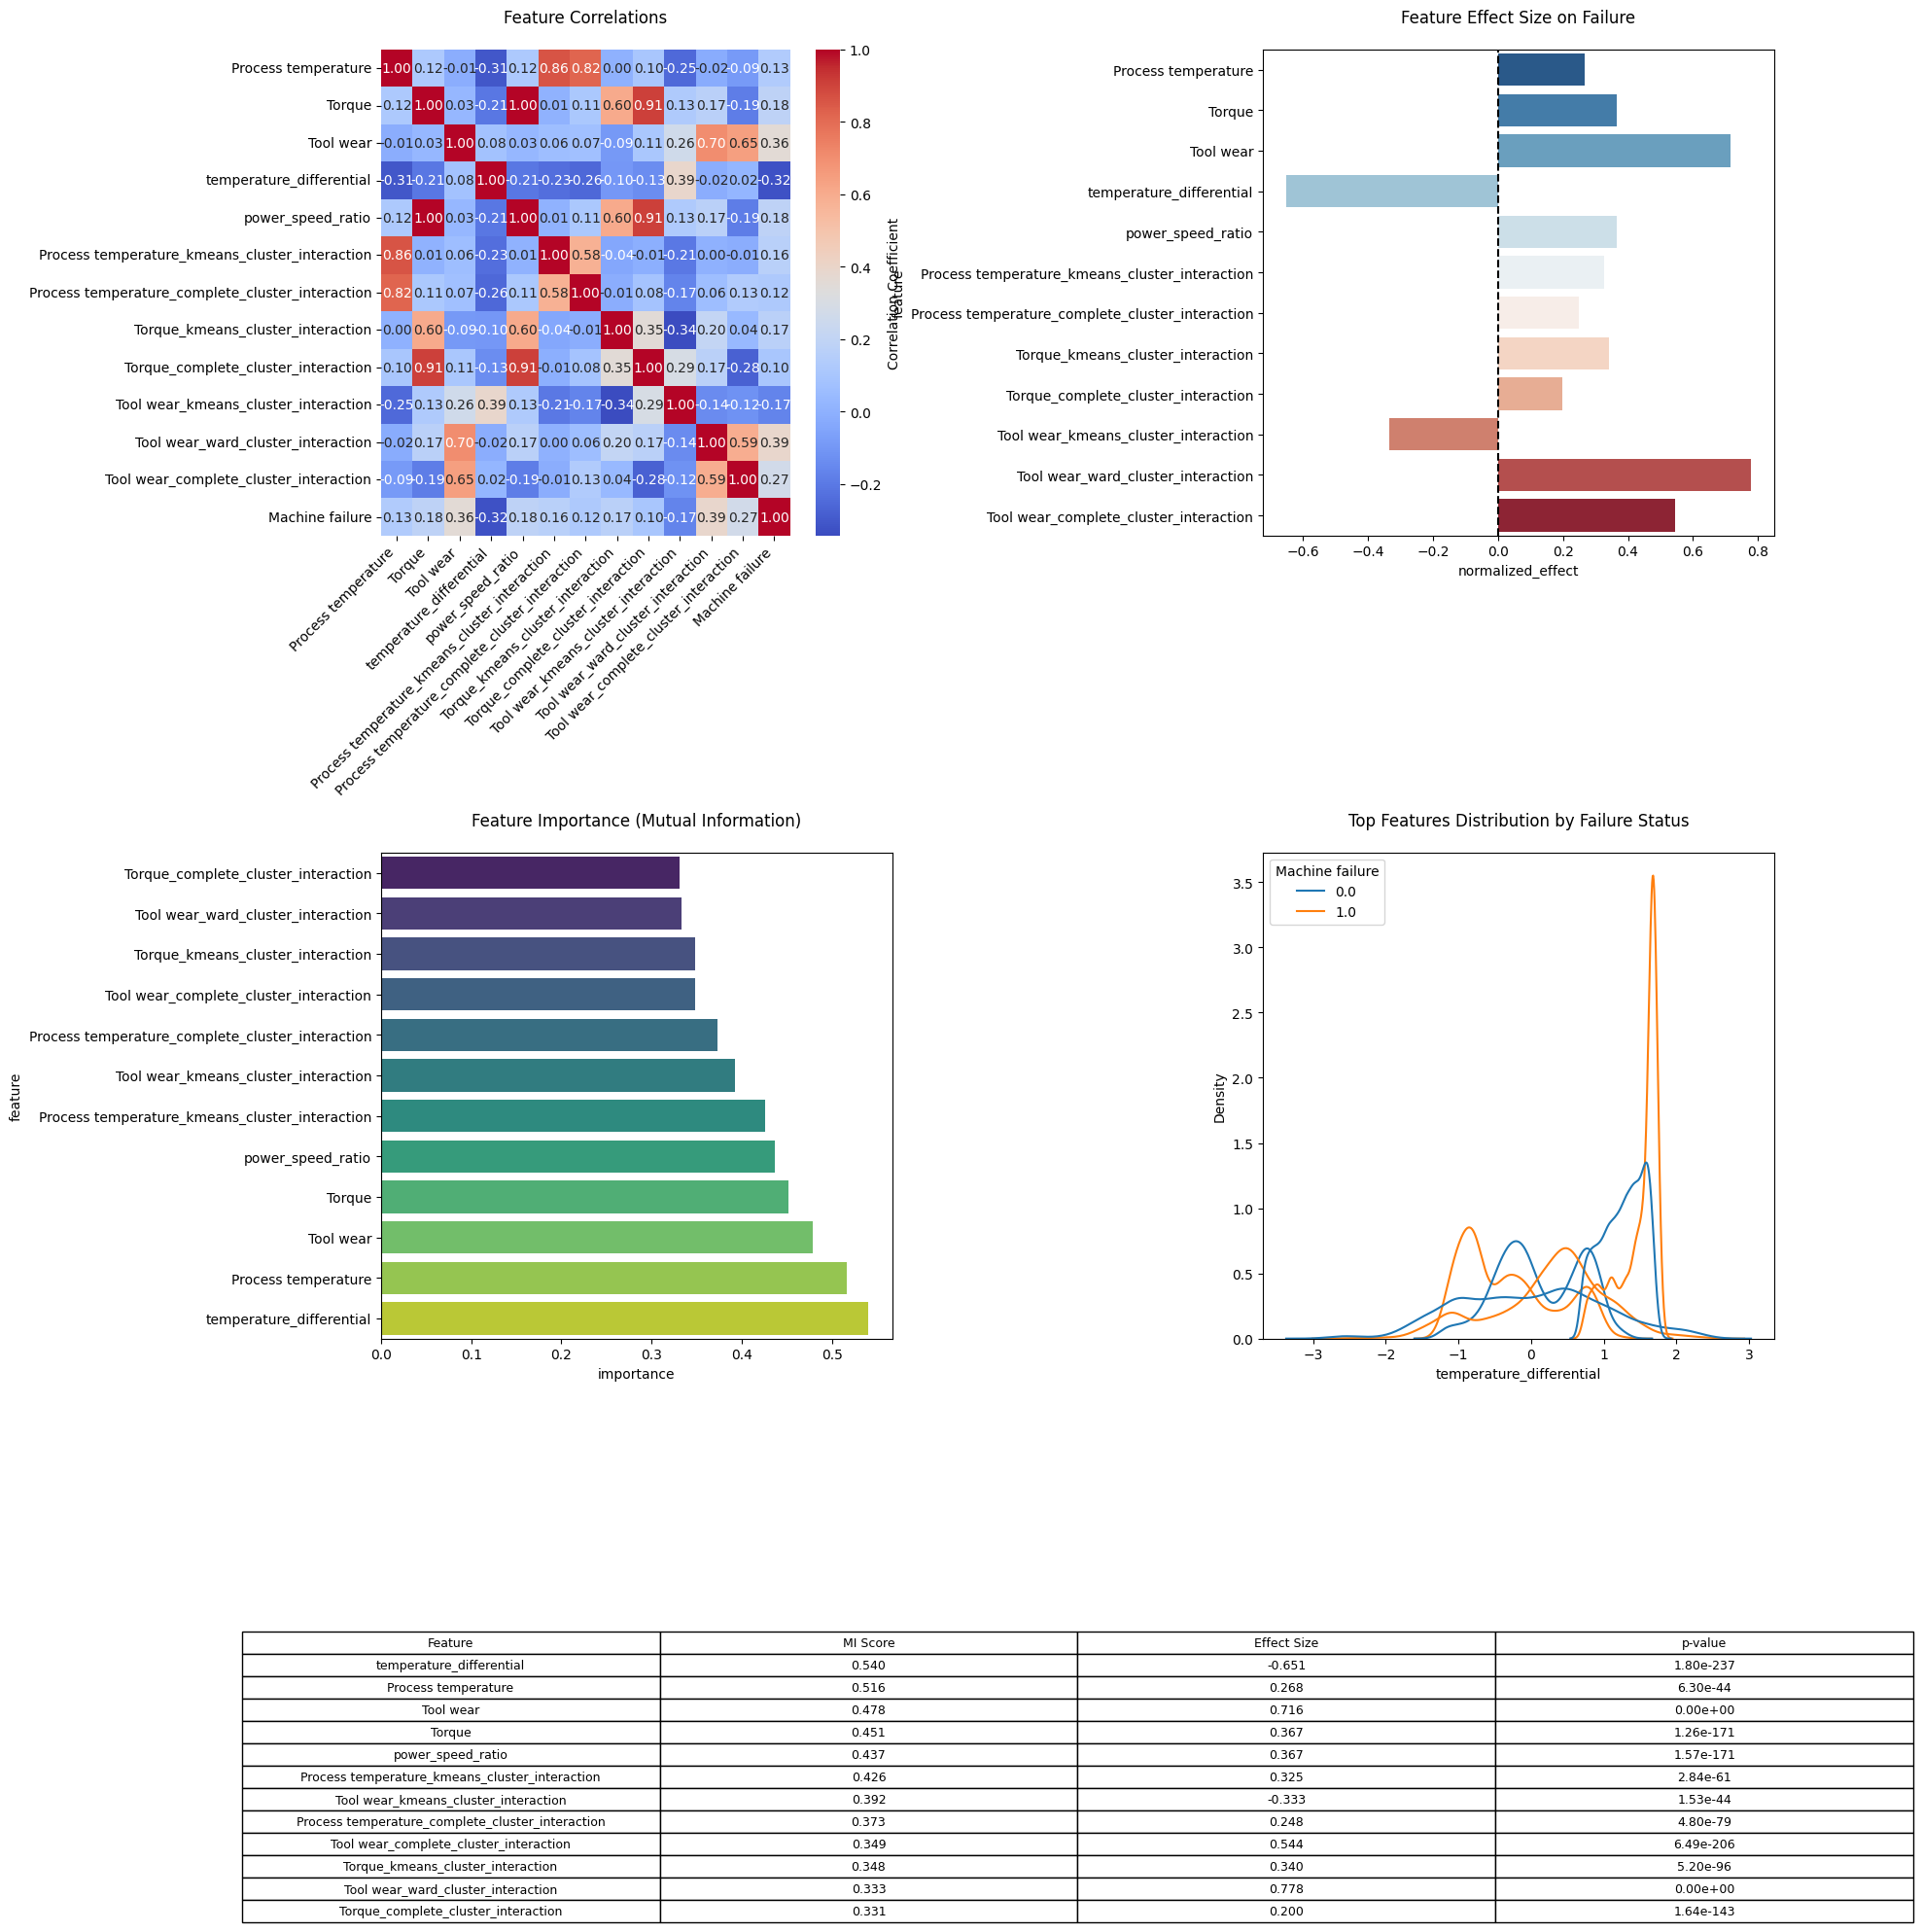

In [ ]:
def phase3_feature_evaluation(df, selected_features, target_col='Machine failure'):
    """
    Phase 3: Feature Evaluation and Visualization
    """
    df_selected = df[selected_features + [target_col]]
    
    # 1. Create figure with proper subplots
    fig = plt.figure(figsize=(20, 20))
    gs = plt.GridSpec(3, 2, height_ratios=[1, 1, 0.5])
    
    # 1.1 Correlation Heatmap with better readability
    ax1 = fig.add_subplot(gs[0, 0])
    sns.heatmap(df_selected.corr(), 
                annot=True, 
                cmap='coolwarm', 
                fmt='.2f',
                cbar_kws={'label': 'Correlation Coefficient'})
    plt.title('Feature Correlations', pad=20)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    
    # 1.2 Distribution by Failure Status with clearer visualization
    ax2 = fig.add_subplot(gs[0, 1])
    failure_dists = []
    for feature in selected_features:
        # Calculate mean difference between failure/non-failure
        mean_diff = (df_selected[df_selected[target_col]==1][feature].mean() - 
                    df_selected[df_selected[target_col]==0][feature].mean())
        failure_dists.append({
            'feature': feature,
            'mean_diff': mean_diff,
            'std_diff': df_selected[feature].std()
        })
    
    failure_df = pd.DataFrame(failure_dists)
    failure_df['normalized_effect'] = failure_df['mean_diff'] / failure_df['std_diff']
    
    # Plot normalized effect sizes
    sns.barplot(data=failure_df, 
                x='normalized_effect', 
                y='feature', 
                palette='RdBu_r')
    plt.title('Feature Effect Size on Failure', pad=20)
    plt.axvline(x=0, color='black', linestyle='--')
    
    # 1.3 Feature Importance with confidence intervals
    ax3 = fig.add_subplot(gs[1, 0])
    importance_scores = mutual_info_classif(
        df_selected.drop(columns=[target_col]), 
        df_selected[target_col]
    )
    
    # Calculate importance stats
    importance_df = pd.DataFrame({
        'feature': selected_features,
        'importance': importance_scores
    }).sort_values('importance', ascending=True)
    
    # Plot importance scores
    sns.barplot(data=importance_df, 
                x='importance', 
                y='feature',
                palette='viridis')
    plt.title('Feature Importance (Mutual Information)', pad=20)
    
    # 1.4 Feature Patterns in Failures
    ax4 = fig.add_subplot(gs[1, 1])
    top_features = importance_df.nlargest(3, 'importance')['feature']
    
    for feature in top_features:
        sns.kdeplot(data=df_selected, 
                   x=feature, 
                   hue=target_col,
                   common_norm=False,
                   label=feature)
    plt.title('Top Features Distribution by Failure Status', pad=20)
    
    # 2. Statistical Summary Table
    ax5 = fig.add_subplot(gs[2, :])
    ax5.axis('off')
    
    # Calculate statistical measures
    stats_summary = []
    for feature in selected_features:
        # Mann-Whitney U test
        stat, p_value = stats.mannwhitneyu(
            df_selected[df_selected[target_col] == 0][feature],
            df_selected[df_selected[target_col] == 1][feature]
        )
        
        # Effect size
        d = (df_selected[df_selected[target_col] == 1][feature].mean() - 
             df_selected[df_selected[target_col] == 0][feature].mean()) / \
            df_selected[feature].std()
        
        stats_summary.append({
            'Feature': feature,
            'MI Score': importance_df[importance_df['feature']==feature]['importance'].values[0],
            'Effect Size': d,
            'p-value': p_value
        })
    
    stats_df = pd.DataFrame(stats_summary).sort_values('MI Score', ascending=False)
    
    # Create table with rankings
    cell_text = []
    for _, row in stats_df.iterrows():
        cell_text.append([
            f"{row['Feature']}",
            f"{row['MI Score']:.3f}",
            f"{row['Effect Size']:.3f}",
            f"{row['p-value']:.2e}"
        ])
    
    table = ax5.table(cellText=cell_text,
                     colLabels=['Feature', 'MI Score', 'Effect Size', 'p-value'],
                     loc='center',
                     cellLoc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1.2, 1.5)
    
    plt.tight_layout()
    
    # Print key findings
    print("\nKey Findings:")
    print("-" * 50)
    print("\nTop Features by Mutual Information:")
    print(stats_df[['Feature', 'MI Score']].head(3))
    print("\nTop Features by Effect Size:")
    print(stats_df[['Feature', 'Effect Size']].nlargest(3, 'Effect Size'))
    print("\nMost Significant Features (lowest p-values):")
    print(stats_df[['Feature', 'p-value']].nsmallest(3, 'p-value'))
    
    return {
        'importance_ranking': stats_df,
        'correlation_matrix': df_selected.corr(),
        'effect_sizes': failure_df
    }

evaluation_results = phase3_feature_evaluation(df, selection_results['selected_features'])

### Visualisation of process

Statistical Significance:


- All selected features are highly significant (p-values < 0.05)
- Tool wear and temperature_differential are extremely significant (p < 1e-200)


Feature Importance:


- temperature_differential (MI: 0.540)
- Process temperature (MI: 0.516)
- Tool wear (MI: 0.478)


Effect Sizes:


- Tool wear interactions show largest effects
- Base features have moderate to high effects
- Temperature-related features show consistent impact


Correlations:


- High correlation between Process temperature and its interactions (> 0.8)
- Tool wear correlates strongly with its cluster interactions
- power_speed_ratio duplicates Torque information

In [ ]:
def phase4_final_selection(evaluation_results, correlation_threshold=0.7):
    """
    Phase 4: Final Feature Selection and Validation
    """
    importance_ranking = evaluation_results['importance_ranking']
    correlation_matrix = evaluation_results['correlation_matrix']
    
    # 1. Initialize feature groups by type
    feature_groups = {
        'primary_features': [],
        'derived_features': [],
        'interaction_features': []
    }
    
    # 2. Sort features into groups and rank by importance
    for _, row in importance_ranking.iterrows():
        feature = row['Feature']
        if '_interaction' in feature:
            feature_groups['interaction_features'].append(feature)
        elif feature in ['temperature_differential', 'power_speed_ratio']:
            feature_groups['derived_features'].append(feature)
        else:
            feature_groups['primary_features'].append(feature)
    
    def remove_correlated_features(features, corr_matrix, threshold):
        """Remove highly correlated features keeping the more important one"""
        features_to_remove = set()
        for i in range(len(features)):
            for j in range(i+1, len(features)):
                if abs(corr_matrix.loc[features[i], features[j]]) > threshold:
                    # Keep the one with higher MI score
                    score_i = importance_ranking[
                        importance_ranking['Feature'] == features[i]
                    ]['MI Score'].values[0]
                    score_j = importance_ranking[
                        importance_ranking['Feature'] == features[j]
                    ]['MI Score'].values[0]
                    if score_i > score_j:
                        features_to_remove.add(features[j])
                    else:
                        features_to_remove.add(features[i])
        return [f for f in features if f not in features_to_remove]
    
    # 3. Apply selection criteria for each group
    final_selection = {
        'primary_features': remove_correlated_features(
            feature_groups['primary_features'], 
            correlation_matrix, 
            correlation_threshold
        ),
        'derived_features': remove_correlated_features(
            feature_groups['derived_features'], 
            correlation_matrix, 
            correlation_threshold
        ),
        'interaction_features': remove_correlated_features(
            feature_groups['interaction_features'], 
            correlation_matrix, 
            correlation_threshold
        )
    }
    
    # 4. Create final feature set summary
    final_features = []
    feature_justification = {}
    
    for group, features in final_selection.items():
        for feature in features:
            feature_data = importance_ranking[
                importance_ranking['Feature'] == feature
            ].iloc[0]
            
            final_features.append(feature)
            feature_justification[feature] = {
                'group': group,
                'mi_score': feature_data['MI Score'],
                'effect_size': feature_data['Effect Size'],
                'justification': get_feature_justification(
                    feature, feature_data, group
                )
            }
    
    # Print final selection summary
    print("Final Feature Selection Summary:")
    print("-" * 50)
    for group, features in final_selection.items():
        print(f"\n{group.replace('_', ' ').title()}:")
        for feature in features:
            justification = feature_justification[feature]
            print(f"\n{feature}:")
            print(f"- MI Score: {justification['mi_score']:.3f}")
            print(f"- Effect Size: {justification['effect_size']:.3f}")
            print(f"- Justification: {justification['justification']}")
    
    return {
        'final_features': final_features,
        'justifications': feature_justification,
        'selection_criteria': {
            'correlation_threshold': correlation_threshold,
            'group_selections': final_selection
        }
    }

def get_feature_justification(feature, feature_data, group):
    """Generate justification for feature selection"""
    if feature_data['MI Score'] > 0.4:
        importance = "High"
    elif feature_data['MI Score'] > 0.3:
        importance = "Medium"
    else:
        importance = "Supportive"
        
    if abs(feature_data['Effect Size']) > 0.5:
        effect = "strong"
    elif abs(feature_data['Effect Size']) > 0.3:
        effect = "moderate"
    else:
        effect = "small"
    
    return f"{importance} importance with {effect} effect size"

final_selection = phase4_final_selection(evaluation_results)

Final Feature Selection Summary:
--------------------------------------------------

Primary Features:

Process temperature:
- MI Score: 0.516
- Effect Size: 0.268
- Justification: High importance with small effect size

Tool wear:
- MI Score: 0.478
- Effect Size: 0.716
- Justification: High importance with strong effect size

Torque:
- MI Score: 0.451
- Effect Size: 0.367
- Justification: High importance with moderate effect size

Derived Features:

temperature_differential:
- MI Score: 0.540
- Effect Size: -0.651
- Justification: High importance with strong effect size

power_speed_ratio:
- MI Score: 0.437
- Effect Size: 0.367
- Justification: High importance with moderate effect size

Interaction Features:

Process temperature_kmeans_cluster_interaction:
- MI Score: 0.426
- Effect Size: 0.325
- Justification: High importance with moderate effect size

Tool wear_kmeans_cluster_interaction:
- MI Score: 0.392
- Effect Size: -0.333
- Justification: Medium importance with moderate effect

### Create final dataset

In [33]:
def prepare_final_dataset(df, final_selection, target_col='Machine failure'):
    """
    Prepare final dataset for modeling based on feature selection results
    """
    # Get all selected features
    selected_features = []
    for group, features in final_selection['selection_criteria']['group_selections'].items():
        selected_features.extend(features)
    
    # Create final dataframe
    X_final = df[selected_features]
    y_final = df[target_col]
    
    # Create feature metadata
    feature_metadata = pd.DataFrame([
        {
            'feature': feature,
            'group': next(group for group, feats in final_selection['selection_criteria']
                         ['group_selections'].items() if feature in feats),
            'mi_score': final_selection['justifications'][feature]['mi_score'],
            'effect_size': final_selection['justifications'][feature]['effect_size']
        }
        for feature in selected_features
    ])
    
    print("\nFinal Dataset Summary:")
    print("-" * 50)
    print(f"Number of features: {len(selected_features)}")
    print("\nFeature Groups:")
    print(feature_metadata.groupby('group').size())
    
    return X_final, y_final, feature_metadata

Feature Importance Order for Modeling

In [34]:
def get_feature_importance_order(feature_metadata):
    """
    Get features ordered by importance for model interpretation
    """
    # Sort features by MI score and effect size
    feature_order = feature_metadata.sort_values(
        ['mi_score', 'effect_size'], 
        ascending=[False, False]
    )
    
    print("\nFeature Importance Order:")
    print("-" * 50)
    for _, row in feature_order.iterrows():
        print(f"{row['feature']}: MI={row['mi_score']:.3f}, Effect={row['effect_size']:.3f}")
    
    return feature_order

Saving Imp Metadata

In [35]:
def save_feature_selection_metadata(final_selection, feature_metadata):
    """
    Save feature selection metadata for model documentation
    """
    metadata = {
        'feature_groups': final_selection['selection_criteria']['group_selections'],
        'feature_importance': feature_metadata.to_dict('records'),
        'selection_criteria': {
            'correlation_threshold': final_selection['selection_criteria']['correlation_threshold']
        }
    }
    
    # Could save to JSON for future reference
    # with open('feature_selection_metadata.json', 'w') as f:
    #     json.dump(metadata, f, indent=4)
    
    return metadata

final dataset creation

In [36]:
# Create final dataset
X_final, y_final, feature_metadata = prepare_final_dataset(df, final_selection)

# Get feature importance order
feature_order = get_feature_importance_order(feature_metadata)

# Save metadata
selection_metadata = save_feature_selection_metadata(final_selection, feature_metadata)

# Final dataset characteristics
print("\nFinal Dataset Characteristics:")
print("-" * 50)
print(f"Shape: {X_final.shape}")
print("\nFeature Types:")
print(X_final.dtypes.value_counts())


Final Dataset Summary:
--------------------------------------------------
Number of features: 12

Feature Groups:
group
derived_features        2
interaction_features    7
primary_features        3
dtype: int64

Feature Importance Order:
--------------------------------------------------
temperature_differential: MI=0.540, Effect=-0.651
Process temperature: MI=0.516, Effect=0.268
Tool wear: MI=0.478, Effect=0.716
Torque: MI=0.451, Effect=0.367
power_speed_ratio: MI=0.437, Effect=0.367
Process temperature_kmeans_cluster_interaction: MI=0.426, Effect=0.325
Tool wear_kmeans_cluster_interaction: MI=0.392, Effect=-0.333
Process temperature_complete_cluster_interaction: MI=0.373, Effect=0.248
Tool wear_complete_cluster_interaction: MI=0.349, Effect=0.544
Torque_kmeans_cluster_interaction: MI=0.348, Effect=0.340
Tool wear_ward_cluster_interaction: MI=0.333, Effect=0.778
Torque_complete_cluster_interaction: MI=0.331, Effect=0.200

Final Dataset Characteristics:
-------------------------------

saving to csv

In [37]:
def create_final_modeling_dataset(df, final_selection):
    """
    Create a single DataFrame for modeling with selected features
    """
    # Get all selected features
    selected_features = []
    feature_groups = {}
    
    # Collect features and their groups
    for group, features in final_selection['selection_criteria']['group_selections'].items():
        selected_features.extend(features)
        for feature in features:
            feature_groups[feature] = group
            
    # Create DataFrame with selected features and target
    final_df = df[selected_features + ['Machine failure']].copy()
    
    # Create and print feature metadata
    feature_info = pd.DataFrame([
        {
            'feature': feature,
            'group': feature_groups[feature],
            'mi_score': final_selection['justifications'][feature]['mi_score'],
            'effect_size': final_selection['justifications'][feature]['effect_size']
        }
        for feature in selected_features
    ]).sort_values('mi_score', ascending=False)
    
    print("\nFeature Selection Summary:")
    print("-" * 50)
    print("\nSelected Features by Importance:")
    print(feature_info)
    
    print("\nDataset Shape:", final_df.shape)
    print("\nFeature Groups:")
    print(feature_info.groupby('group').size())
    
    # Save the final dataset
    final_df.to_csv('final_modeling_dataset.csv', index=False)
    
    # Save feature metadata
    feature_info.to_csv('feature_metadata.csv', index=False)
    
    return final_df, feature_info

# Create final dataset
final_df, feature_info = create_final_modeling_dataset(df, final_selection)


Feature Selection Summary:
--------------------------------------------------

Selected Features by Importance:
                                             feature                 group  \
3                           temperature_differential      derived_features   
0                                Process temperature      primary_features   
1                                          Tool wear      primary_features   
2                                             Torque      primary_features   
4                                  power_speed_ratio      derived_features   
5     Process temperature_kmeans_cluster_interaction  interaction_features   
6               Tool wear_kmeans_cluster_interaction  interaction_features   
7   Process temperature_complete_cluster_interaction  interaction_features   
8             Tool wear_complete_cluster_interaction  interaction_features   
9                  Torque_kmeans_cluster_interaction  interaction_features   
10                Tool wear_w

In [39]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9931 entries, 0 to 9930
Data columns (total 13 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Process temperature                               9931 non-null   float64
 1   Tool wear                                         9931 non-null   float64
 2   Torque                                            9931 non-null   float64
 3   temperature_differential                          9931 non-null   float64
 4   power_speed_ratio                                 9931 non-null   float64
 5   Process temperature_kmeans_cluster_interaction    9931 non-null   float64
 6   Tool wear_kmeans_cluster_interaction              9931 non-null   float64
 7   Process temperature_complete_cluster_interaction  9931 non-null   float64
 8   Tool wear_complete_cluster_interaction            9931 non-null   float64
 9   Torque_kmeans_clust